In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import folium
import plotly.express as px
import json
import numpy as np

In [20]:
# macOS 기본 한글 폰트 설정 (AppleSDGothicNeo 등)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [5]:
path = '/Users/yniyunj/Desktop/교육공공데이터/데이터/002-전출입생수/'

df_24 = pd.read_csv(path + '2024년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df_23 = pd.read_csv(path + '2023년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df_22 = pd.read_csv(path + '2022년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df_21 = pd.read_csv(path + '2021년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df_20 = pd.read_csv(path + '2020년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df_19 = pd.read_csv(path + '2019년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df_18 = pd.read_csv(path + '2018년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df_17 = pd.read_csv(path + '2017년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df_16 = pd.read_csv(path + '2016년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df_15 = pd.read_csv(path + '2015년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')

In [6]:
df_24.columns

Index(['시도교육청', '교육지원청', '지역', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부',
       '제외사유', '1학년 전입학생수', '1학년 전출학생수', '1학년 전체학생수', '2학년 전입학생수', '2학년 전출학생수',
       '2학년 전체학생수', '3학년 전입학생수', '3학년 전출학생수', '3학년 전체학생수', '4학년 전입학생수',
       '4학년 전출학생수', '4학년 전체학생수', '5학년 전입학생수', '5학년 전출학생수', '5학년 전체학생수',
       '6학년 전입학생수', '6학년 전출학생수', '6학년 전체 학생수', '전입학생수(계)', '전출학생수(계)',
       '전체학생수(계)'],
      dtype='object')

# 데이터 전처리

- 2025년도의 각 학교 SCR index 값은??

In [42]:
df_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6307 entries, 0 to 6306
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시도교육청       6307 non-null   object 
 1   교육지원청       6307 non-null   object 
 2   지역          6304 non-null   object 
 3   정보공시 학교코드   6307 non-null   object 
 4   학교명         6307 non-null   object 
 5   학교급코드       6307 non-null   int64  
 6   설립구분        6307 non-null   object 
 7   제외여부        6307 non-null   object 
 8   제외사유        4 non-null      object 
 9   1학년 전입학생수   6303 non-null   float64
 10  1학년 전출학생수   6303 non-null   float64
 11  1학년 전체학생수   6303 non-null   float64
 12  2학년 전입학생수   6303 non-null   float64
 13  2학년 전출학생수   6303 non-null   float64
 14  2학년 전체학생수   6303 non-null   float64
 15  3학년 전입학생수   6303 non-null   float64
 16  3학년 전출학생수   6303 non-null   float64
 17  3학년 전체학생수   6303 non-null   float64
 18  4학년 전입학생수   6303 non-null   float64
 19  4학년 전출학생수   6303 non-null  

In [43]:
df_24[df_24['제외사유'].notnull()]

,시도교육청,교육지원청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,1학년 전입학생수,...,4학년 전체학생수,5학년 전입학생수,5학년 전출학생수,5학년 전체학생수,6학년 전입학생수,6학년 전출학생수,6학년 전체 학생수,전입학생수(계),전출학생수(계),전체학생수(계)
3247,경기도교육청,경기도고양교육지원청,경기도 고양시 덕양구,S090007678,지효초등학교,2,공립,Y,본교는 해당항목에 대해서 통계자료가 없으므로 제외함.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3253,경기도교육청,경기도안양과천교육지원청,경기도 과천시,S090007937,과천율목초등학교,2,공립,Y,본교는 해당항목에 대해서 통계자료가 없으므로 제외함.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3298,강원특별자치도교육청,강원특별자치도고성교육지원청,강원특별자치도 고성군,S100000736,대진초등학교명파분교장,2,공립,Y,본교는 해당항목에 대해서 통계자료가 없으므로 제외함.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_23[df_23['제외사유'].notnull()]

,시도교육청,교육지원청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,1학년 전입학생수,...,4학년 전체학생수,5학년 전입학생수,5학년 전출학생수,5학년 전체학생수,6학년 전입학생수,6학년 전출학생수,6학년 전체 학생수,전입학생수(계),전출학생수(계),전체학생수(계)
3,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,S010000739,서울개포초등학교,2,공립,Y,본교는 해당항목에 대해서 통계자료가 없으므로 제외함.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3082,경기도교육청,경기도동두천양주교육지원청,경기도 양주시,S090006062,연푸른초등학교,2,공립,Y,본교는 해당항목에 대해서 통계자료가 없으므로 제외함.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3202,경기도교육청,경기도광주하남교육지원청,경기도 광주시,S090007328,능평초등학교,2,공립,Y,본교는 해당항목에 대해서 통계자료가 없으므로 제외함.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3246,경기도교육청,경기도시흥교육지원청,경기도 시흥시,S090007929,시화나래초등학교,2,공립,Y,본교는 해당항목에 대해서 통계자료가 없으므로 제외함.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_22[df_22['제외사유'].notnull()]

,시도교육청,교육지원청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,1학년 전입학생수,...,4학년 전체학생수,5학년 전입학생수,5학년 전출학생수,5학년 전체학생수,6학년 전입학생수,6학년 전출학생수,6학년 전체 학생수,전입학생수(계),전출학생수(계),전체학생수(계)
1140,대구광역시교육청,대구광역시서부교육지원청,대구광역시 북구,S030002150,대구국우초등학교,2,공립,Y,본교는 해당항목에 대해서 통계자료가 없으므로 제외함.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6189,경상남도교육청,진주교육지원청,경상남도 진주시,S160004032,은하수초등학교,2,공립,Y,본교는 해당항목에 대해서 통계자료가 없으므로 제외함.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_21[df_21['제외사유'].notnull()]

,시도교육청,교육지원청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,1학년 전입학생수,...,4학년 전체학생수,5학년 전입학생수,5학년 전출학생수,5학년 전체학생수,6학년 전입학생수,6학년 전출학생수,6학년 전체 학생수,전입학생수(계),전출학생수(계),전체학생수(계)
1412,인천광역시교육청,인천광역시서부교육지원청,인천광역시 서구,S040002308,인천청호초등학교,2,공립,Y,본교는 해당항목에 대해서 통계자료가 없으므로 제외함.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3210,경기도교육청,경기도구리남양주교육지원청,경기도 남양주시,S090007407,다산하늘초등학교,2,공립,Y,본교는 해당항목에 대해서 통계자료가 없으므로 제외함.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3213,경기도교육청,경기도시흥교육지원청,경기도 시흥시,S090007437,한여울초등학교,2,공립,Y,본교는 해당항목에 대해서 통계자료가 없으므로 제외함.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3216,경기도교육청,경기도광주하남교육지원청,경기도 하남시,S090007520,단샘초등학교,2,공립,Y,본교는 해당항목에 대해서 통계자료가 없으므로 제외함.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3596,강원특별자치도교육청,강원특별자치도춘천교육지원청,강원특별자치도 춘천시,S100004016,퇴계초등학교,2,공립,Y,본교는 해당항목에 대해서 통계자료가 없으므로 제외함.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.1 해당 학교 학생수 감소율 ($S_i$)

- 3년간 연평균 학생수 감소율의 평균
- 단기적으로 학교 규모 축소의 빠르기를 계산   

- $S_i = \frac{1}{3} \sum_{k=1}^3 \frac{총학생수_{k년전} - 총학생수_{k-1년전}}{총학생수_{k년전}}$

In [31]:
df_24 = pd.read_csv(path + '2024년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df_23 = pd.read_csv(path + '2023년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df_22 = pd.read_csv(path + '2022년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')

In [36]:
# 1. 연도별 필요한 컬럼 추출 (학교코드 + 총학생수만)
df_21_1 = df_21[['정보공시 학교코드', '전체학생수(계)']].rename(columns={'전체학생수(계)': 'student_2021'})
df_22_1 = df_22[['정보공시 학교코드', '전체학생수(계)']].rename(columns={'전체학생수(계)': 'student_2022'})
df_23_1 = df_23[['정보공시 학교코드', '전체학생수(계)']].rename(columns={'전체학생수(계)': 'student_2023'})
df_24_1 = df_24[['정보공시 학교코드', '전체학생수(계)']].rename(columns={'전체학생수(계)': 'student_2024'})

# 2. 병합 (학교코드 기준)
df_merge = df_21_1.merge(df_22_1, on='정보공시 학교코드', how='inner') \
                  .merge(df_23_1, on='정보공시 학교코드', how='inner') \
                  .merge(df_24_1, on='정보공시 학교코드', how='inner')

# 3. S_i 계산
df_merge['S_i'] = (1/3) * (
    (df_merge['student_2021'] - df_merge['student_2022']) / df_merge['student_2021'] +
    (df_merge['student_2022'] - df_merge['student_2023']) / df_merge['student_2022'] +
    (df_merge['student_2023'] - df_merge['student_2024']) / df_merge['student_2023']
)

# 4. 결과 추출
df_result_1 = df_merge[['정보공시 학교코드', 'S_i']]

df_result_1 = df_result_1.merge(df_24[['정보공시 학교코드', '학교명', '지역']], on='정보공시 학교코드', how='left')
df_result_1[['정보공시 학교코드', '학교명', '지역', 'S_i']]

,정보공시 학교코드,학교명,지역,S_i
0,S000003511,서울교육대학교부설초등학교,서울특별시 서초구,0.002172
1,S000003563,서울대학교사범대학부설초등학교,서울특별시 종로구,0.017272
2,S010000738,서울개일초등학교,서울특별시 강남구,-0.041978
3,S010000741,서울구룡초등학교,서울특별시 강남구,-0.153333
4,S010000742,서울논현초등학교,서울특별시 강남구,0.070639
...,...,...,...,...
6232,S170000801,월랑초등학교,제주특별자치도 제주시,0.046472
6233,S170000834,이도초등학교,제주특별자치도 제주시,0.021267
6234,S170000836,도련초등학교,제주특별자치도 제주시,-0.029111
6235,S170000837,삼화초등학교,제주특별자치도 제주시,0.047898


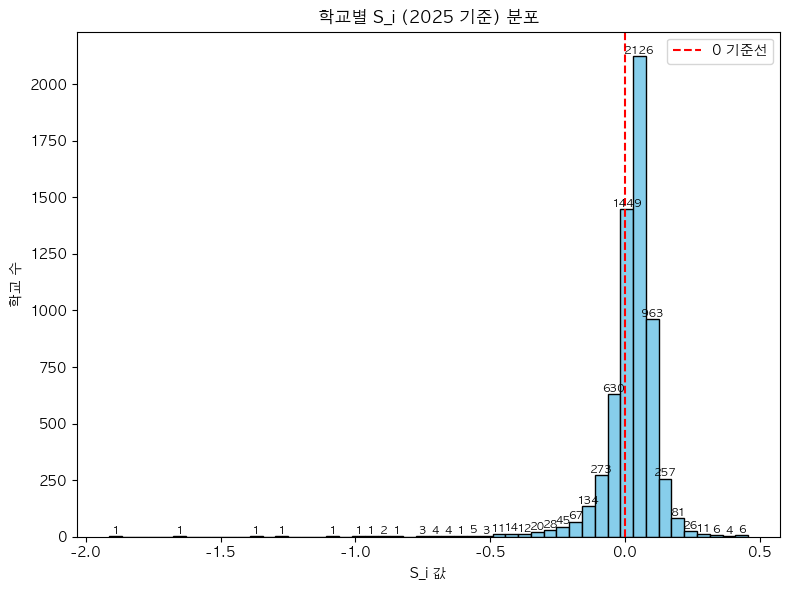

In [48]:
# inf, -inf, NaN 제거
data = df_result_1['S_i'].replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(8, 6))

# 히스토그램 그리기
counts, bin_edges, patches = plt.hist(
    data, 
    bins=50, 
    color='skyblue', 
    edgecolor='black'
)

# 0 기준선
plt.axvline(0, color='red', linestyle='--', label='0 기준선')

# 각 막대 위에 숫자 표시
for count, x in zip(counts, bin_edges[:-1]):
    if count > 0:
        plt.text(
            x + (bin_edges[1] - bin_edges[0])/2,
            count + 0.5,
            int(count),
            ha='center', va='bottom', fontsize=8
        )

plt.title("학교별 S_i (2025 기준) 분포")
plt.xlabel("S_i 값")
plt.ylabel("학교 수")
plt.legend()
plt.tight_layout()
plt.show()

## 1.2 해당 학교 전출입 증가율 ($T_i$)

- 3년간 연평균 전출 증가율의 평균
- 학생들이 해당 학교를 떠나는 흐름이 가속화되는지 계산   

- $T_i = \frac{1}{3} \sum_{k=1}^3 \frac{전출수_{k년전} - 전입수_{k년전}}{총학생수_{k년전}}$

In [17]:
df_24.columns

Index(['시도교육청', '교육지원청', '지역', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부',
       '제외사유', '1학년 전입학생수', '1학년 전출학생수', '1학년 전체학생수', '2학년 전입학생수', '2학년 전출학생수',
       '2학년 전체학생수', '3학년 전입학생수', '3학년 전출학생수', '3학년 전체학생수', '4학년 전입학생수',
       '4학년 전출학생수', '4학년 전체학생수', '5학년 전입학생수', '5학년 전출학생수', '5학년 전체학생수',
       '6학년 전입학생수', '6학년 전출학생수', '6학년 전체 학생수', '전입학생수(계)', '전출학생수(계)',
       '전체학생수(계)'],
      dtype='object')

In [37]:
# 필요한 열만 추출
cols = ['정보공시 학교코드', '지역', '학교명', '전입학생수(계)', '전출학생수(계)', '전체학생수(계)']

# 필요한 연도 데이터 정제
df_22_2 = df_22[cols].copy()
df_23_2 = df_23[cols].copy()
df_24_2 = df_24[cols].copy()

# 연도 정보 추가
df_22_2['year'] = 2022
df_23_2['year'] = 2023
df_24_2['year'] = 2024

# 통합
df_all = pd.concat([df_22_2, df_23_2, df_24_2])

# 계산식: (전출 - 전입) / 전체학생수
df_all['T_i (2025 기준)'] = (df_all['전출학생수(계)'] - df_all['전입학생수(계)']) / df_all['전체학생수(계)']

# 학교별 평균 계산
df_result_2 = df_all.groupby(['정보공시 학교코드', '지역', '학교명'])['T_i (2025 기준)'].mean().reset_index()

df_result_2

,정보공시 학교코드,지역,학교명,T_i (2025 기준)
0,S000003493,대구광역시 중구,경북대학교사범대학부설초등학교,0.005502
1,S000003499,충청남도 공주시,공주교육대학교부설초등학교,0.006023
2,S000003503,광주광역시 북구,광주교육대학교광주부설초등학교,0.001744
3,S000003504,전라남도 목포시,광주교육대학교목포부설초등학교,0.005784
4,S000003506,대구광역시 달서구,대구교육대학교대구부설초등학교,0.002331
...,...,...,...,...
6344,S170000801,제주특별자치도 제주시,월랑초등학교,0.006928
6345,S170000834,제주특별자치도 제주시,이도초등학교,0.000337
6346,S170000836,제주특별자치도 제주시,도련초등학교,0.016552
6347,S170000837,제주특별자치도 제주시,삼화초등학교,0.001006


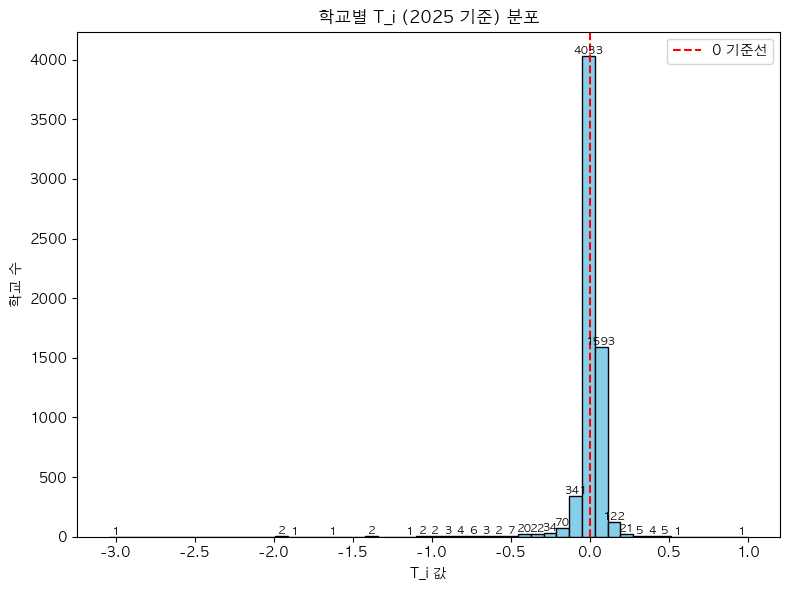

In [30]:
# inf, -inf, NaN 제거
data = df_T['T_i (2025 기준)'].replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(8, 6))

# 히스토그램 그리기
counts, bin_edges, patches = plt.hist(
    data, 
    bins=50, 
    color='skyblue', 
    edgecolor='black'
)

# 0 기준선
plt.axvline(0, color='red', linestyle='--', label='0 기준선')

# 각 막대 위에 숫자 표시
for count, x in zip(counts, bin_edges[:-1]):
    if count > 0:
        plt.text(
            x + (bin_edges[1] - bin_edges[0])/2,
            count + 0.5,
            int(count),
            ha='center', va='bottom', fontsize=8
        )

plt.title("학교별 T_i (2025 기준) 분포")
plt.xlabel("T_i 값")
plt.ylabel("학교 수")
plt.legend()
plt.tight_layout()
plt.show()

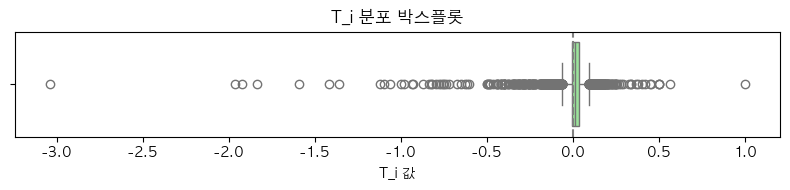

In [24]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_T['T_i (2025 기준)'], color='lightgreen')
plt.axvline(0, color='gray', linestyle='--')
plt.title("T_i 분포 박스플롯")
plt.xlabel("T_i 값")
plt.tight_layout()
plt.show()

## 1.3 해당 통학구역 신생아수 감소율 ($B_i$)

- 7년간 연평균 신생아수 감소율의 평균
- 해당 지역의 미래 학령인구 기반이 약화되고 있는 정도   

- $B_i = \frac{1}{7} \sum_{k=1}^7 \frac{신생아수_{k년전} - 신생아수_{k-1년전}}{신생아수_{k년전}}$

## 1.4 인접학교 밀집도 ($D_i$)

- 폐교해도 대체가 가능한지 보여주는 지표
- 밀집도가 높을수록 전출 가능성↑, 폐교 용이성↑   

- $D_i = 반경 R km 이내의 초등학교 수$

# 2. 모델링